In [9]:
from selenium import webdriver
import pandas as pd
import html5lib

def Set_up_WebScraping(url):
    
    driver = webdriver.Chrome(r"C:\Users\JourneyQ\OneDrive - kmutnb.ac.th\Desktop\Quick_file\year_2-S_2\softdev-2\week2\chromedriver.exe")
    driver.get(url)
    
    return driver

driver = Set_up_WebScraping("https://www.set.or.th/th/market/index/set100/overview")

C:\Users\JourneyQ\AppData\Local\Temp\ipykernel_10172\4220934917.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\JourneyQ\OneDrive - kmutnb.ac.th\Desktop\Quick_file\year_2-S_2\softdev-2\week2\chromedriver.exe")


In [11]:
def get_set50_100_df(driver):
    
    data = driver.page_source
    data_df = pd.read_html(data)[2]
    clean_column = []
    for column in data_df.columns:

        clean_column.append(column.replace("  (Click to sort Ascending)",""))
        
    data_df.columns = clean_column
    data_df = data_df.set_index('หลักทรัพย์')
    return data_df

data_df = get_set50_100_df(driver)
data_df

,เปิด,สูงสุด,ต่ำสุด,ล่าสุด,เปลี่ยนแปลง,% เปลี่ยนแปลง,เสนอซื้อ,เสนอขาย,ปริมาณ (หุ้น),มูลค่า ('000 บาท)
หลักทรัพย์,,,,,,,,,,
ACE,2.56,2.58,2.54,2.56,0.00,0.00,2.56,2.58,13693466,35057.19
ADVANC,188.00,190.00,188.00,190.00,1.50,0.80,189.50,190.00,4748237,899783.81
AEONTS,174.00,177.00,173.50,176.50,3.00,1.73,176.00,177.00,625291,109522.20
AMATA,20.00,20.30,20.00,20.10,-0.10,-0.50,20.10,20.20,3949119,79446.06
AOT,72.75,73.25,72.50,73.00,0.00,0.00,73.00,73.25,13561538,989642.08
...,...,...,...,...,...,...,...,...,...,...
TTA,8.35,8.40,8.25,8.25,-0.25,-2.94,8.25,8.30,4392334,36422.00
TTB,1.36,1.37,1.35,1.37,0.00,0.00,1.36,1.37,96426369,131304.72
TU,16.70,16.80,16.60,16.60,0.00,0.00,16.50,16.60,8848261,147100.86


In [12]:
def get_stock_data(driver,stock,all_stock_dict):
    
    stock = stock.split()[0]
    url_target_financial = "https://www.set.or.th/th/market/product/stock/quote/" + stock + "/financial-statement/company-highlights"
    driver.get(url_target_financial)
    stock_data = driver.page_source
    table_a = pd.read_html(stock_data)[0]
    table_b = pd.read_html(stock_data)[1]
    all_stock_dict[stock] = [table_a,table_b]
    
    return driver , all_stock_dict

In [32]:
def create_stock_data(driver):
    
    all_stock_dict = dict()

    for stock in data_df.index :

        driver, all_stock_dict = get_stock_data(driver,stock,all_stock_dict)

    return  all_stock_dict

all_stock_dict = create_stock_data(driver)

In [14]:
all_stock_dict.keys()

dict_keys(['ACE', 'ADVANC', 'AEONTS', 'AMATA', 'AOT', 'AP', 'AWC', 'BAM', 'BANPU', 'BBL', 'BCH', 'BCP', 'BCPG', 'BDMS', 'BEC', 'BEM', 'BGRIM', 'BH', 'BLA', 'BTS', 'CBG', 'CENTEL', 'CHG', 'CK', 'CKP', 'COM7', 'CPALL', 'CPF', 'CPN', 'CRC', 'DOHOME', 'DTAC', 'EA', 'EGCO', 'EPG', 'ESSO', 'FORTH', 'GLOBAL', 'GPSC', 'GULF', 'GUNKUL', 'HANA', 'HMPRO', 'INTUCH', 'IRPC', 'IVL', 'JMART', 'JMT', 'KBANK', 'KCE', 'KEX', 'KKP', 'KTB', 'KTC', 'LH', 'MAJOR', 'MEGA', 'MINT', 'MTC', 'ONEE', 'OR', 'ORI', 'OSP', 'PLANB', 'PSL', 'PTG', 'PTT', 'PTTEP', 'PTTGC', 'QH', 'RATCH', 'RBF', 'RCL', 'SAWAD', 'SCB', 'SCC', 'SCGP', 'SINGER', 'SPALI', 'SPRC', 'STA', 'STARK', 'STEC', 'STGT', 'SUPER', 'SYNEX', 'TASCO', 'TCAP', 'THANI', 'TIDLOR', 'TIPH', 'TISCO', 'TOP', 'TQM', 'TRUE', 'TTA', 'TTB', 'TU', 'VGI', 'WHA'])

In [25]:
stock_df = all_stock_dict['ACE']
stock_df[0]

,งวดงบการเงิน ณ วันที่,งบปี 2561 31 ธ.ค. 2561,งบปี 2562 31 ธ.ค. 2562,งบปี 2563 31 ธ.ค. 2563,งบปี 2564 31 ธ.ค. 2564,งบ 9 เดือน2565 30 ก.ย. 2565
0,บัญชีทางการเงินที่สำคัญ,NaN,NaN,NaN,NaN,NaN
1,สินทรัพย์รวม,13886.74,14145.18,16429.69,18740.20,19758.94
2,หนี้สินรวม,8315.10,3352.14,4436.86,5371.62,5514.60
3,ส่วนของผู้ถือหุ้น,5571.64,10793.04,11992.83,13315.33,14186.55
4,มูลค่าหุ้นที่เรียกชำระแล้ว,4579.00,5088.00,5088.00,5088.00,5088.00
5,รายได้รวม,4848.94,5088.17,6038.96,5739.67,5086.59
6,กำไร (ขาดทุน) จากกิจกรรมอื่น,-10.04,-103.51,6.67,167.96,184.95
7,กำไรสุทธิ,546.57,815.31,1507.64,1505.68,1087.95
8,กำไรต่อหุ้น (บาท),0.06,0.09,0.15,0.15,0.11
9,อัตราส่วนทางการเงินที่สำคัญ,NaN,NaN,NaN,NaN,NaN


In [18]:
stock_df[0].set_index('งวดงบการเงิน ณ วันที่')

,งบปี 2561 31 ธ.ค. 2561,งบปี 2562 31 ธ.ค. 2562,งบปี 2563 31 ธ.ค. 2563,งบปี 2564 31 ธ.ค. 2564,งบ 9 เดือน2565 30 ก.ย. 2565
งวดงบการเงิน ณ วันที่,,,,,
บัญชีทางการเงินที่สำคัญ,NaN,NaN,NaN,NaN,NaN
สินทรัพย์รวม,13886.74,14145.18,16429.69,18740.20,19758.94
หนี้สินรวม,8315.10,3352.14,4436.86,5371.62,5514.60
ส่วนของผู้ถือหุ้น,5571.64,10793.04,11992.83,13315.33,14186.55
มูลค่าหุ้นที่เรียกชำระแล้ว,4579.00,5088.00,5088.00,5088.00,5088.00
รายได้รวม,4848.94,5088.17,6038.96,5739.67,5086.59
กำไร (ขาดทุน) จากกิจกรรมอื่น,-10.04,-103.51,6.67,167.96,184.95
กำไรสุทธิ,546.57,815.31,1507.64,1505.68,1087.95
กำไรต่อหุ้น (บาท),0.06,0.09,0.15,0.15,0.11


In [20]:
stock_df[1].set_index('ค่าสถิติสำคัญ ณ วันที่')

,30 ธ.ค. 2562,30 ธ.ค. 2563,30 ธ.ค. 2564,23 ธ.ค. 2565
ค่าสถิติสำคัญ ณ วันที่,,,,
ราคาล่าสุด (บาท),4.22,3.64,3.50,2.56
มูลค่าหลักทรัพย์ตามราคาตลาด (ล้านบาท),42942.72,37040.64,35616.00,26050.56
วันที่ของงบการเงินที่ใช้คำนวณค่าสถิติ,-,30 ก.ย. 2563,30 ก.ย. 2564,30 ก.ย. 2565
P/E (เท่า),62.46,24.71,25.58,17.79
P/BV (เท่า),-,3.15,2.75,1.82
มูลค่าหุ้นทางบัญชีต่อหุ้น (บาท),-,1.15,1.27,1.40
อัตราส่วนเงินปันผลตอบแทน (%),-,-,1.37,0.79


In [35]:
for key in all_stock_dict.keys():
    
    stock_df = all_stock_dict[key]
    stock_df[0] = stock_df[0].set_index('งวดงบการเงิน ณ วันที่')
    stock_df[1] = stock_df[1].set_index('ค่าสถิติสำคัญ ณ วันที่')

In [41]:
all_stock_dict['TU'][1]

,28 ธ.ค. 2561,30 ธ.ค. 2562,30 ธ.ค. 2563,30 ธ.ค. 2564,23 ธ.ค. 2565
ค่าสถิติสำคัญ ณ วันที่,,,,,
ราคาล่าสุด (บาท),16.20,13.50,13.60,19.50,16.60
มูลค่าหลักทรัพย์ตามราคาตลาด (ล้านบาท),77303.41,64419.51,64896.69,93050.40,79212.14
วันที่ของงบการเงินที่ใช้คำนวณค่าสถิติ,30 ก.ย. 2561,30 ก.ย. 2562,30 ก.ย. 2563,30 ก.ย. 2564,30 ก.ย. 2565
P/E (เท่า),21.52,16.84,10.83,12.04,9.87
P/BV (เท่า),1.82,1.54,1.25,1.59,1.27
มูลค่าหุ้นทางบัญชีต่อหุ้น (บาท),8.90,8.76,10.88,12.23,13.08
อัตราส่วนเงินปันผลตอบแทน (%),4.07,2.96,3.54,3.69,5.72


In [50]:
n_df = 1
select_column = '30 ธ.ค. 2564'
select_row = 'P/E (เท่า)'

P_E_data_dict = {}

for key in all_stock_dict.keys():
    
    try:
        select_data = all_stock_dict[key][n_df][select_column][select_row]
        P_E_data_dict[key] = float(select_data)
    except KeyError:
        pass
    except ValueError:
        pass
P_E_data_dict

{'ACE': 25.58,
 'ADVANC': 25.13,
 'AEONTS': 11.72,
 'AMATA': 22.82,
 'AP': 6.69,
 'BAM': 30.07,
 'BANPU': 12.16,
 'BBL': 10.27,
 'BCH': 10.79,
 'BCP': 5.6,
 'BCPG': 16.67,
 'BDMS': 47.54,
 'BEC': 38.42,
 'BEM': 109.11,
 'BGRIM': 39.74,
 'BH': 144.49,
 'BLA': 20.62,
 'BTS': 23.11,
 'CBG': 38.04,
 'CHG': 15.22,
 'CK': 55.13,
 'CKP': 19.69,
 'COM7': 43.04,
 'CPALL': 53.78,
 'CPF': 16.86,
 'CPN': 34.37,
 'DOHOME': 33.19,
 'DTAC': 31.26,
 'EA': 62.79,
 'EGCO': 18.58,
 'EPG': 18.49,
 'ESSO': 6.16,
 'FORTH': 27.34,
 'GLOBAL': 30.94,
 'GPSC': 32.89,
 'GULF': 82.95,
 'GUNKUL': 14.57,
 'HANA': 30.92,
 'HMPRO': 36.6,
 'INTUCH': 23.82,
 'IRPC': 5.64,
 'IVL': 10.94,
 'JMART': 71.81,
 'JMT': 74.72,
 'KBANK': 8.12,
 'KCE': 49.38,
 'KEX': 51.29,
 'KKP': 9.36,
 'KTB': 9.18,
 'KTC': 25.67,
 'LH': 14.45,
 'MAJOR': 9.89,
 'MEGA': 23.45,
 'MTC': 23.89,
 'ONEE': 29.13,
 'OR': 26.9,
 'ORI': 9.15,
 'OSP': 31.61,
 'PLANB': 605.01,
 'PSL': 9.48,
 'PTG': 14.3,
 'PTT': 11.55,
 'PTTEP': 15.24,
 'PTTGC': 5.5,
 'QH'

In [52]:
P_E_result = pd.DataFrame([P_E_data_dict])
P_E_result

,ACE,ADVANC,AEONTS,AMATA,AP,BAM,BANPU,BBL,BCH,BCP,...,TIDLOR,TIPH,TISCO,TOP,TQM,TTA,TTB,TU,VGI,WHA
0,25.58,25.13,11.72,22.82,6.69,30.07,12.16,10.27,10.79,5.6,...,28.24,21.33,11.6,6.82,33.98,7.12,15.94,12.04,52.99,26.19


In [53]:
P_E_result = P_E_result.transpose()
P_E_result

,0
ACE,25.58
ADVANC,25.13
AEONTS,11.72
AMATA,22.82
AP,6.69
...,...
TTA,7.12
TTB,15.94
TU,12.04
VGI,52.99


In [57]:
P_E_result.columns = [select_row]
P_E_result

,P/E (เท่า)
ACE,25.58
ADVANC,25.13
AEONTS,11.72
AMATA,22.82
AP,6.69
...,...
TTA,7.12
TTB,15.94
TU,12.04
VGI,52.99


In [59]:
# ascending=False เรียงจากมากไปน้อย
P_E_result = P_E_result.sort_values(by='P/E (เท่า)',ascending=False)
P_E_result

,P/E (เท่า)
PLANB,605.01
BH,144.49
BEM,109.11
RBF,102.66
GULF,82.95
...,...
BCP,5.60
PTTGC,5.50
RCL,3.67
STGT,2.85


<AxesSubplot:title={'center':'SET100 p/e by stock'}>

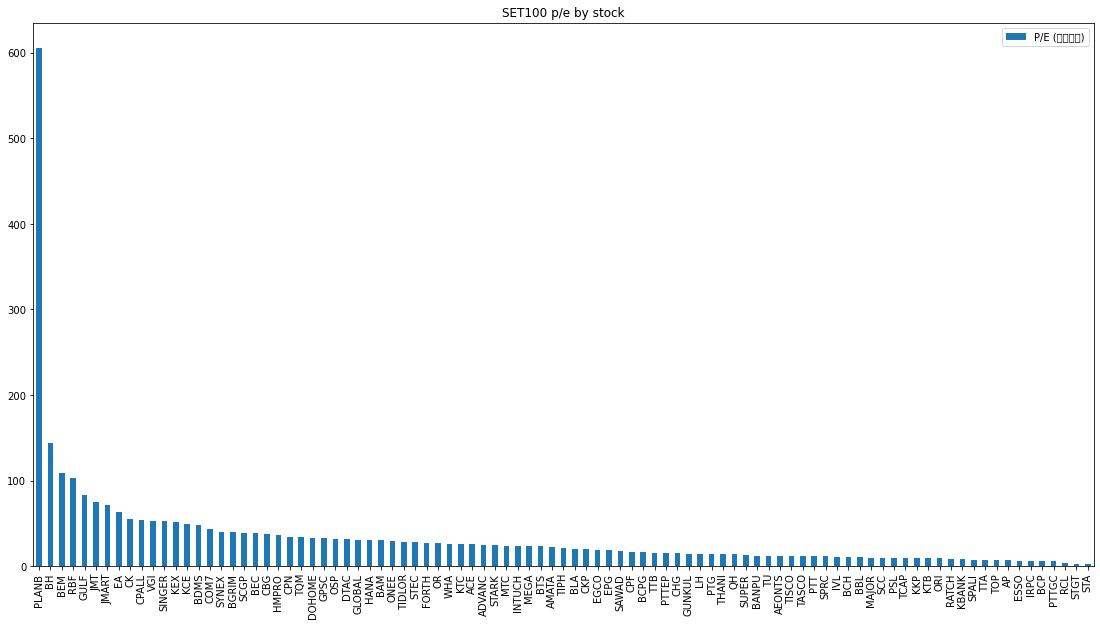

In [68]:
P_E_result.plot(kind='bar',figsize=(19,10),title='SET100 p/e by stock')

In [71]:
# filter
focus = P_E_result[(P_E_result['P/E (เท่า)'] >= 15) & (P_E_result['P/E (เท่า)']<=25)]
focus

,P/E (เท่า)
STARK,24.33
MTC,23.89
INTUCH,23.82
MEGA,23.45
BTS,23.11
AMATA,22.82
TIPH,21.33
BLA,20.62
CKP,19.69
EGCO,18.58


<AxesSubplot:>

C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


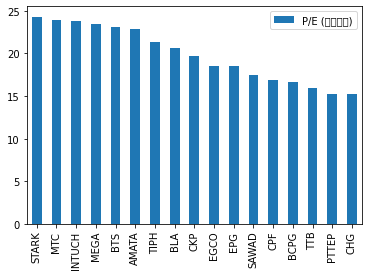

In [72]:
focus.plot(kind='bar')

Conclusion 

In [ ]:
def prepare_df(key,all_stock_dict):
    
    stock_df = all_stock_dict[key]
    stock_df[0] = stock_df[0].set_index('งวดงบการเงิน ณ วันที่')
    stock_df[1] = stock_df[1].set_index('ค่าสถิติสำคัญ ณ วันที่')  

In [73]:
def set_all_prepare_df(all_stock_dict):
    
    for key in all_stock_dict.keys():
    
        prepare_df(key,all_stock_dict)

In [76]:
def update_select_data(n_df,select_column,select_row,all_stock_dict,key,P_E_data_dict):
    
    try:
        select_data = all_stock_dict[key][n_df][select_column][select_row]
        P_E_data_dict[key] = float(select_data)
    except KeyError:
        pass
    except ValueError:
        pass
    
    return P_E_data_dict

In [90]:
def get_data(n_df,select_column,select_row,all_stock_dict):

    result_data_dict = {}

    for key in all_stock_dict.keys():

        result_data_dict = update_select_data(n_df,select_column,select_row,all_stock_dict,key,result_data_dict)
        
    return result_data_dict

In [101]:
def generate_df(result_data_dict,select_row):
    
    result_data_dict = pd.DataFrame([result_data_dict])
    result_data_dict = result_data_dict.transpose()
    result_data_dict.columns = [select_row]
    result_data_dict = result_data_dict.sort_values(by=select_row,ascending=False)
    
    return result_data_dict

In [110]:
n_df = 1
select_column = '30 ธ.ค. 2564'
select_row = 'P/E (เท่า)'

result_P_E = get_data(n_df,select_column,select_row,all_stock_dict)
result_P_E = generate_df(result_P_E,select_row)
result_P_E

,P/E (เท่า)
PLANB,605.01
BH,144.49
BEM,109.11
RBF,102.66
GULF,82.95
...,...
BCP,5.60
PTTGC,5.50
RCL,3.67
STGT,2.85


In [112]:
n_df = 1
select_column = '30 ธ.ค. 2564'
select_row = 'P/BV (เท่า)'

result_P_BV = get_data(n_df,select_column,select_row,all_stock_dict)
result_P_BV = generate_df(result_P_BV,select_row)
result_P_BV

,P/BV (เท่า)
COM7,22.42
JMART,15.12
FORTH,13.20
TQM,12.55
CBG,12.44
...,...
TTB,0.68
BCP,0.66
TCAP,0.62
KTB,0.52


In [114]:
result_P_E['P/BV (เท่า)'] = result_P_BV
result_P_E

,P/E (เท่า),P/BV (เท่า)
PLANB,605.01,6.17
BH,144.49,6.75
BEM,109.11,3.41
RBF,102.66,10.89
GULF,82.95,6.02
...,...,...
BCP,5.60,0.66
PTTGC,5.50,0.85
RCL,3.67,2.14
STGT,2.85,2.17


In [115]:
result_P_E.loc['BH']

P/E (เท่า)     144.49
P/BV (เท่า)      6.75
Name: BH, dtype: float64

<AxesSubplot:title={'center':'SET100 p/e by stock'}>

C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JourneyQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


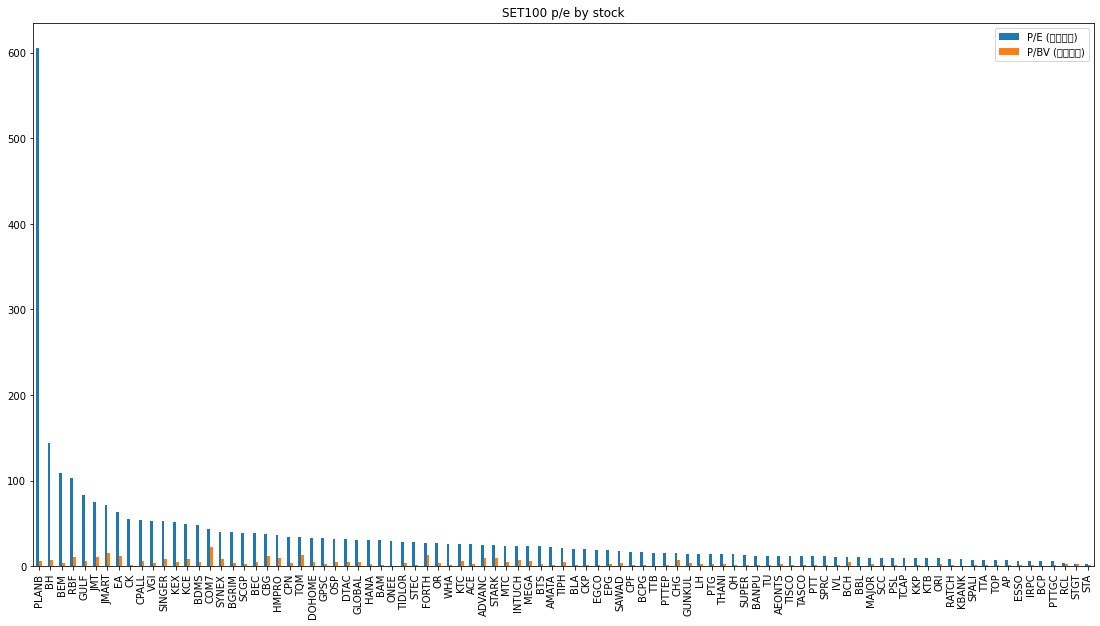

In [116]:
result_P_E.plot(kind='bar',figsize=(19,10),title='SET100 p/e by stock')